In [1]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def S(basis) :
    N = basis.shape[0]
    Overlap_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Overlap_matrix[p,q] = (np.pi/(basis[p] + basis[q]))**(3/2)
            Overlap_matrix[q,p] = Overlap_matrix[p,q]
    return Overlap_matrix

def T(basis) :
    N = basis.shape[0]
    Kintetic_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Kintetic_matrix[p,q] = 3*basis[p]*basis[q]*np.pi**(3/2)/(basis[p] + basis[q])**(5/2)
            Kintetic_matrix[q,p] = Kintetic_matrix[p,q]
    return Kintetic_matrix

def A(basis) :
    N = basis.shape[0]
    Coulomb_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Coulomb_matrix[p,q] = -2*np.pi/(basis[p] + basis[q])
            Coulomb_matrix[q,p] = Coulomb_matrix[p,q]
    return Coulomb_matrix

def Gaussian(alpha, r):
    return m.exp(-alpha*r**2)

In [3]:
def Hydrogen(a0,a1,print_eigenfunction) : 
    basis = np.array([a0, a1])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy

In [8]:
def gradient_descent(a0,a1,step_size,limit) :
    gradient = np.array([[Hydrogen(a0+step_size,a1,0) - Hydrogen(a0,a1,0)], [Hydrogen(a0,a1+step_size,0) - Hydrogen(a0,a1,0)]])/step_size
    i = 0
    data = np.array([[i],[Hydrogen(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.0001:
        a0 = a0 - step_size*gradient[0,0]
        a1 = a1 - step_size*gradient[1,0]
        i += 1
        gradient = np.array([[Hydrogen(a0+0.00001,a1,0) - Hydrogen(a0,a1,0)], [Hydrogen(a0,a1+0.00001,0) - Hydrogen(a0,a1,0)]])/0.00001
        data = np.append(data,[[i],[Hydrogen(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]], axis = 1)
    return data

def momentum_gd(a0,a1,step_size,limit) :
    gradient = np.array([[Hydrogen(a0+0.00001,a1,0) - Hydrogen(a0,a1,0)], [Hydrogen(a0,a1+0.00001,0) - Hydrogen(a0,a1,0)]])/0.00001
    v = np.zeros((2,1))
    i = 0
    data = np.array([[i],[Hydrogen(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.0001:
        v = step_size*gradient + 0.9*v
        a0 = a0 - v[0,0] 
        a1 = a1 - v[1,0] 
        i += 1
        gradient = np.array([[Hydrogen(a0+0.00001,a1,0) - Hydrogen(a0,a1,0)], [Hydrogen(a0,a1+0.00001,0) - Hydrogen(a0,a1,0)]])/0.00001
        data = np.append(data,[[i],[Hydrogen(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]], axis = 1)
    return data

def nag(a0,a1,step_size,limit) :
    gradient = np.array([[Hydrogen(a0+0.00001,a1,0) - Hydrogen(a0,a1,0)], [Hydrogen(a0,a1+0.00001,0) - Hydrogen(a0,a1,0)]])/0.00001
    v = np.zeros((2,1))
    i = 0
    data = np.array([[i],[Hydrogen(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.0001:
        v = step_size*gradient + 0.9*v
        a0 = a0 - v[0,0] 
        a1 = a1 - v[1,0] 
        i += 1
        gradient = np.array([[Hydrogen(a0-v[0,0] +0.00001,a1- v[1,0],0) - Hydrogen(a0-v[0,0],a1- v[1,0],0)], [Hydrogen(a0- v[0,0],a1- v[1,0] +0.00001,0) - Hydrogen(a0- v[0,0],a1-v[1,0] ,0)]])/0.00001
        data = np.append(data,[[i],[Hydrogen(a0,a1,0)],[a0],[a1],[np.linalg.norm(gradient)]], axis = 1)
    return data

[ 2.13400000e+03 -4.85812461e-01  2.01164723e-01  1.32749480e+00
  9.98225442e-05]


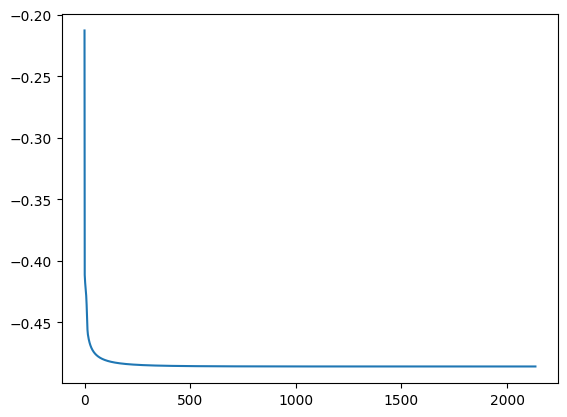

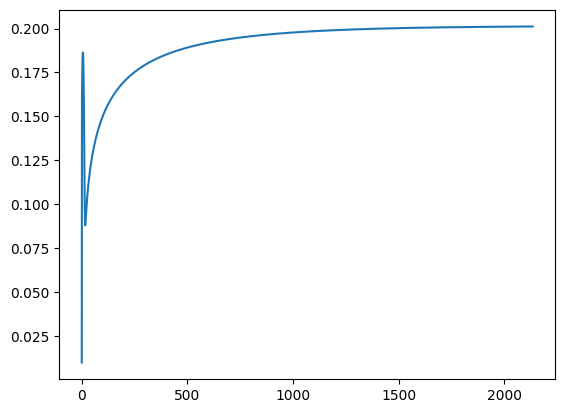

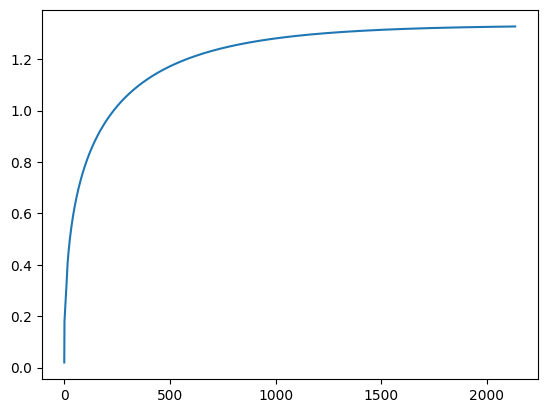

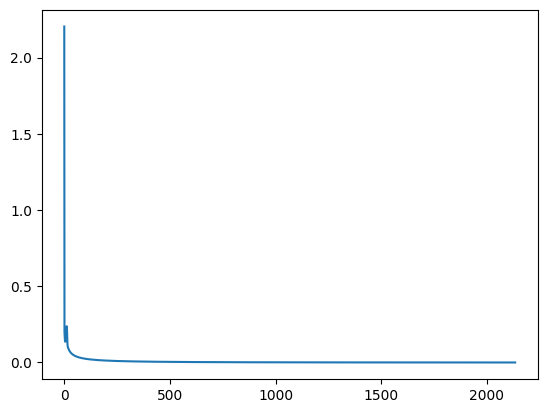

In [9]:
test1 = gradient_descent(0.01,0.02,0.1,10000)
for ele in range(1,5) :
    plt.figure(ele)
    plt.plot(test1[0,:],test1[ele,:])
print(test1[:,-1])

[ 4.06000000e+02 -4.85812481e-01  2.01870005e-01  1.33732198e+00
  9.92744133e-05]


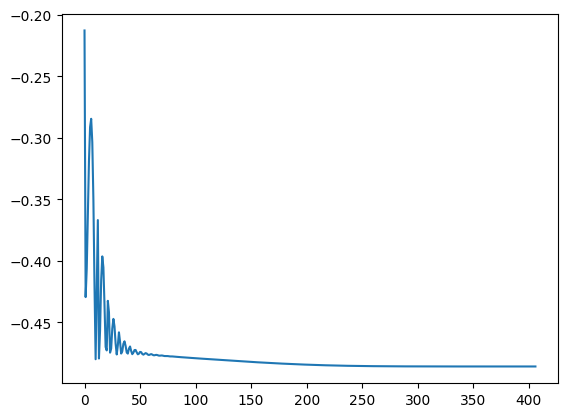

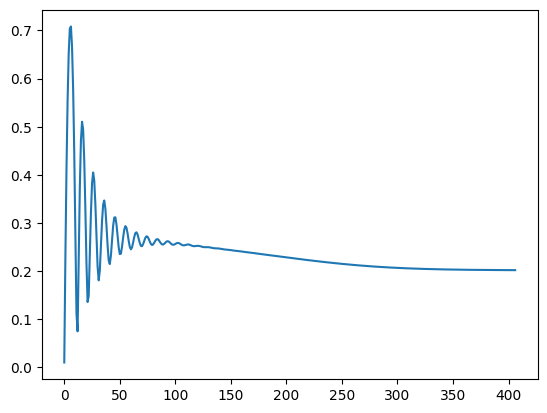

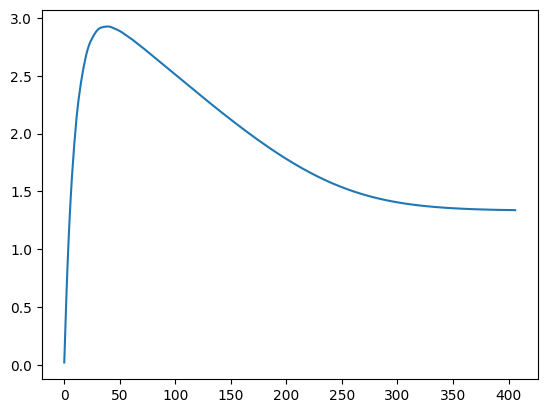

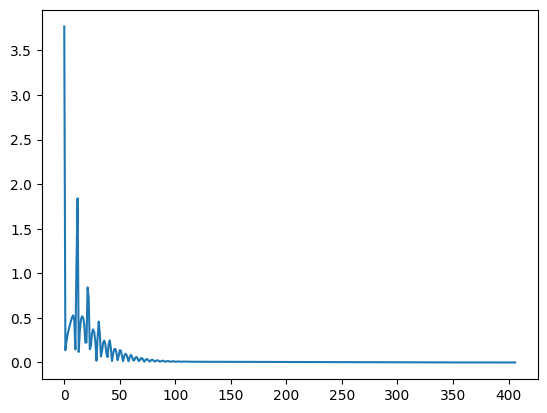

In [6]:
test2 = momentum_gd(0.01,0.02,0.1,10000)
for ele in range(1,5) :
    plt.figure(ele)
    plt.plot(test2[0,:],test2[ele,:])
print(test2[:,-1])

[ 3.85000000e+02 -4.85812469e-01  2.01878818e-01  1.33744533e+00
  9.91015785e-05]


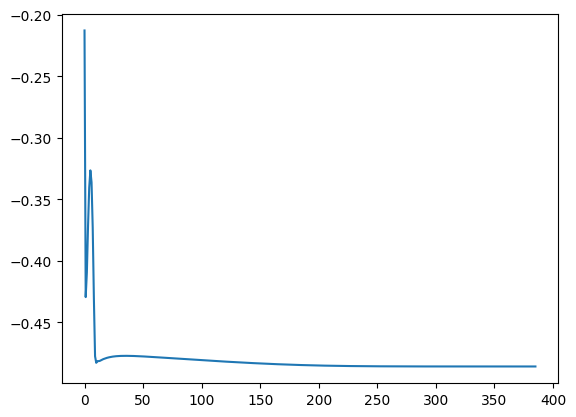

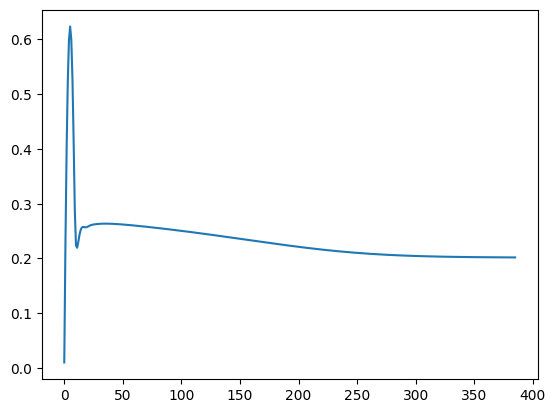

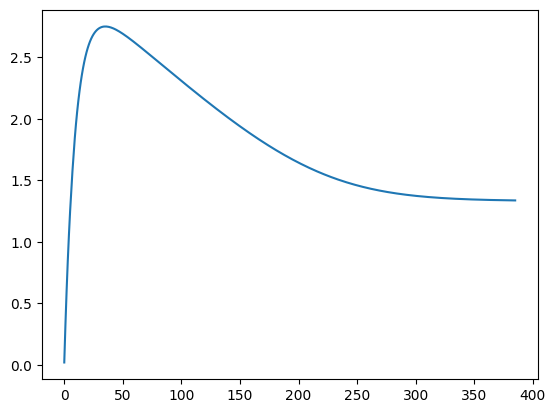

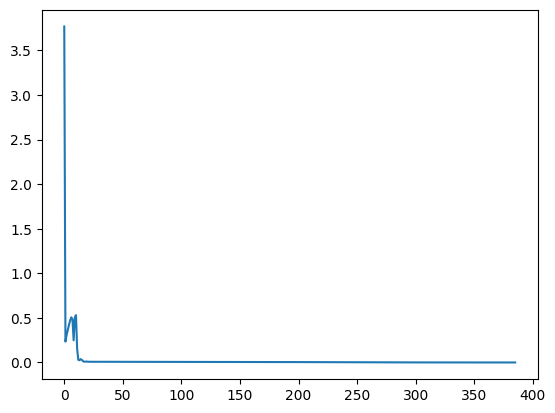

In [7]:
test3 = nag(0.01,0.02,0.1,10000)
for ele in range(1,5) :
    plt.figure(ele)
    plt.plot(test3[0,:],test3[ele,:])
print(test3[:,-1])